# Gif creation

Sometimes it's a great option to create animated plots in your notebook. This page will show you how to convert banch of matplot lib plots to frames of the gif image.

In [1]:
import io

from PIL import Image
from IPython.display import Image as IPImage

import numpy as np
import matplotlib.pyplot as plt

There are three important points:

- You have to store each frame as a buffer and convert it into a `PIL.Image`.
- Create a list of such `PIL.Image` objects for each frame;
- Then use `save` of the first frame, pass all others in `append_images` parameter and specify `format=GIF`;
- Finally, you can pass the gotten buffer to the `IPython.display.Image` function - so your gif will be displayed on your notebook.

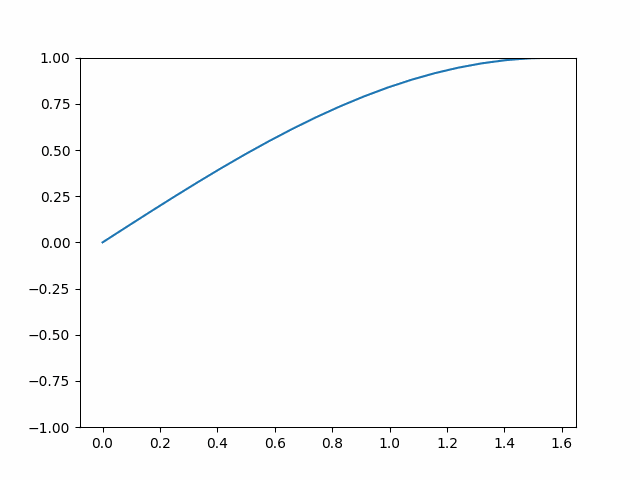

In [2]:
X = np.linspace(0, np.pi/2, 20)
frames = []

for bias in np.linspace(0, np.pi*2 - 0.1, 50):
    fig = plt.figure()
    plt.plot(X, np.sin(X+bias))
    plt.ylim([-1,1])
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    
    plt.close(fig)
    
    frames.append(Image.open(buf))

gif_buf = io.BytesIO()
frames[0].save(
    gif_buf, 
    format='GIF', 
    save_all=True, 
    append_images=frames[1:],
    loop=0
)

IPImage(data=gif_buf.getvalue())